#ANN : Artifitial Neural Network, MLP : Multi Layer Perceptron

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

In [ ]:
#checking gpu availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device : {device}')

Using device : cuda


In [ ]:
#set random seeds for reproductibility
torch.manual_seed(42)

In [ ]:
#Load data set
df = pd.read_csv('sample_data/mnist_train_small.csv')
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


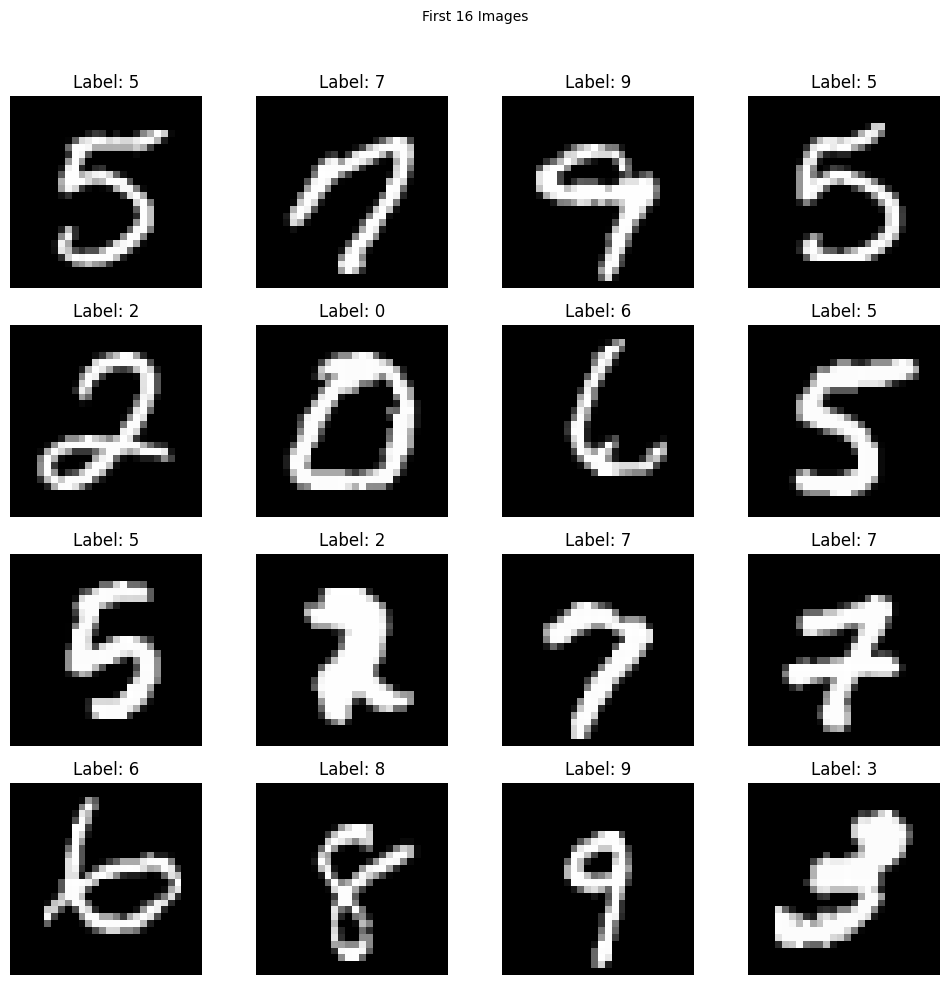

In [ ]:
#create a 4*4 grid of images
fig, axis = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=10)

for i, ax in enumerate(axis.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap='gray')                   # optional: add cmap for grayscale
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
#train test split
X = df.iloc[:,1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Scaling the features
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
#create a Custom Dataset class

class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [ ]:
#create dataset object
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
#train , test, dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
from torch.nn.modules.batchnorm import BatchNorm1d
# #Define NN Class
# class Model(nn.Module):
#   def __init__(self, num_features):
#     super().__init__() #import constructor from parent class
#     self.model = nn.Sequential(
#         nn.Linear(num_features, 128),
#         nn.ReLU(),
#         nn.Linear(128, 64),
#         nn.ReLU(),
#         nn.Linear(64, 10)
#     )

#   def forward(self, features):
#     return self.model(features)

# #After applying drop out, batch Normalization,
class Model(nn.Module):
  def __init__(self, num_features):
    super().__init__() #import constructor from parent class
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64, 10)
    )

  def forward(self, features):
    return self.model(features)

In [ ]:
#set learning rate and epochs
learning_rate = 0.1
epochs = 10

In [ ]:
#instatiate the model
model = Model(X_train.shape[1])
model = model.to(device) # for gpu add this line otherwise no need


In [ ]:
#loss function
loss_function = nn.CrossEntropyLoss()

In [ ]:
#optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4) #weight_decay is added her to impove accuracy this is L2 Regularization

In [ ]:
#training loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device) #option if using GPU so add this line other wise no need
    #forward pass
    output = model(batch_features)

    #loss
    loss = loss_function(output, batch_labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update grade
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()
    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch : {epoch + 1}, loss: {avg_loss}')

Epoch : 1, loss: 0.00016732797979219865
Epoch : 1, loss: 0.00027617960998184605
Epoch : 1, loss: 0.0004821663730901126
Epoch : 1, loss: 0.000582884308205892
Epoch : 1, loss: 0.0006607431220953867
Epoch : 1, loss: 0.0007041877382286063
Epoch : 1, loss: 0.0008373859691429356
Epoch : 1, loss: 0.0008671143768380766
Epoch : 1, loss: 0.0008957661713843477
Epoch : 1, loss: 0.0010438320869112123
Epoch : 1, loss: 0.0011308551829767553
Epoch : 1, loss: 0.001194353066554897
Epoch : 1, loss: 0.0012042208087787918
Epoch : 1, loss: 0.001236706535166053
Epoch : 1, loss: 0.0012703678968307226
Epoch : 1, loss: 0.0013474589266886587
Epoch : 1, loss: 0.0016746979183411082
Epoch : 1, loss: 0.0017096841926835307
Epoch : 1, loss: 0.0017336586705030508
Epoch : 1, loss: 0.002082418341011013
Epoch : 1, loss: 0.0021167738994660036
Epoch : 1, loss: 0.002217651902991411
Epoch : 1, loss: 0.0022914086874642465
Epoch : 1, loss: 0.002318561220643659
Epoch : 1, loss: 0.0023697662118346043
Epoch : 1, loss: 0.0025413605

In [ ]:
#Model to evalmode
model.eval()

Model(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
from numpy._core.fromnumeric import shape
from torch.autograd.grad_mode import no_grad
#evaluation code
total = 0
correct = 0
with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device) #option if using GPU so add this line other wise no need
    output = model(batch_features)
    _, predicted = torch.max(output, 1)
    total = total + batch_labels.shape[0]
    correct = correct + ( predicted == batch_labels).sum()
  print(correct/total)

tensor(0.9707, device='cuda:0')


#For Reduce Overfitting and imporve accuracy
 - Add more data
 - reducing the complexity of NN structure
 - regularization
 - dropouts
 - data augmentation
 - batch normalization
 - early stopping

## After Apply dropouts, batch normalization
 - Accuracy has increase
 - Earlier was : 0.9473 and After Applying : 0.9620
## After Apply L2 , Regularization
 - Accuracy is : 0.9707